# Advanced Python 
## Exploratory Data Analysis (EDA)

In [4]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# load dataset from seaborn library
data=sns.load_dataset("Titanic")

# you can save this built-in dataset to your local drive

data.to_csv("Titanic.csv",index=False) # index=False will not save the index column in the csv file
data.to_excel("Titanic.xlsx",index=False) # index=False will not save the index column in the excel file

In [6]:
# see the first 5 rows of the dataset to understand the data
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Step 1: Data shape and dimensions  

In [7]:
# cheak Data shape and dimension 
print(data.shape)
rows, columns =data.shape
print(f"Num of Rows: {rows} ") # instances or observations or records
print(f"Num of Columns: {columns} ") # series or attributes or features
print(f"The size (rows x columns) is: {data.size}") # size of the data 
print(f"The Dimensions are: {data.ndim}D") # dimensions  of the data

(891, 15)
Num of Rows: 891 
Num of Columns: 15 
The size (rows x columns) is: 13365
The Dimensions are: 2D


# Step 2: Data Structure 

In [8]:
# cheak Data Structure 
data.info() # info about the data
data.describe() # summary statistics of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# see unique values in entire data frame
data.nunique() # unique values in each column

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [10]:
# see unique values in a particular columns like (sex,survived,who etc)
np.unique(data[['sex', 'who','class']].values) #for these perticular colums

array(['First', 'Second', 'Third', 'child', 'female', 'male', 'man',
       'woman'], dtype=object)

In [11]:
# to cheak unique vales in all columns
pd.DataFrame({"values":{col:data[col].unique() for col in data}})

,values
adult_male,"[True, False]"
age,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,..."
alive,"[no, yes]"
alone,"[False, True]"
class,"[Third, First, Second]"
deck,"[nan, C, E, G, D, A, B, F]"
embark_town,"[Southampton, Cherbourg, Queenstown, nan]"
embarked,"[S, C, Q, nan]"
fare,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51...."
parch,"[0, 1, 2, 5, 3, 4, 6]"


In [14]:
# Descriptive Statistics of Categorical Features
data.describe(include="object")

,sex,embarked,class,who,deck,embark_town,alive
count,891,889,891,891,203,889,891
unique,2,3,3,3,7,3,2
top,male,S,Third,man,C,Southampton,no
freq,577,644,491,537,59,644,549


In [15]:
#Descriptive Statistics of non-numerical features/categorical features
data.select_dtypes(exclude="number")

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,S,Third,man,True,NaN,Southampton,no,False
1,female,C,First,woman,False,C,Cherbourg,yes,False
2,female,S,Third,woman,False,NaN,Southampton,yes,True
3,female,S,First,woman,False,C,Southampton,yes,False
4,male,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
886,male,S,Second,man,True,NaN,Southampton,no,True
887,female,S,First,woman,False,B,Southampton,yes,True
888,female,S,Third,woman,False,NaN,Southampton,no,False
889,male,C,First,man,True,C,Cherbourg,yes,True


In [16]:
# cheak the mean of the data 
data.mean(numeric_only=True) # numeric_only=True to exclude non-numeric columns
# cheak the standard deviation of the data
data.std(numeric_only=True) # numeric_only=True to exclude non-numeric columns

survived       0.486592
pclass         0.836071
age           14.526497
sibsp          1.102743
parch          0.806057
fare          49.693429
adult_male     0.489615
alone          0.489615
dtype: float64

In [17]:
# above all functions you can check in the describe() function
data.describe() # summary statistics of the data

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# cheak the median of the data
print (data.median(numeric_only=True)) # numeric_only=True to exclude non-numeric columns
# cheak the mode of the data
data.mode(numeric_only=True) # numeric_only=True to exclude non-numeric columns

survived       0.0000
pclass         3.0000
age           28.0000
sibsp          0.0000
parch          0.0000
fare          14.4542
adult_male     1.0000
alone          1.0000
dtype: float64


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
0,0,3,24.0,0,0,8.05,True,True


In [22]:
#cheak duplicate values in the data  (if any)

# data["fare"].duplicated().sum()
# data["age"].duplicated().sum()
# data["survived"].duplicated().sum()
# data["pclass"].duplicated().sum()


888

In [12]:
# cheak for missing values in the data (NaN or Null) 
data.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
# cheak for missing values in the data (NaN or Null)  with percentage
data.isnull().sum() / data.shape[0]*100
# if missing values are more than 50% then drop the column  its not useful for analysis

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [23]:
data.shape

(891, 15)

In [24]:
# droping complete column (deck is not useful for analysis becase it has more than 50% missing values)
New_data= data.drop(["deck"], axis=1) # axis=1 for columns 
New_data.shape

(891, 14)

In [28]:
# to clean age , we are not dropping age but we will remove null rows from age which are total 177 
#891-177-2 = 712   #2 embark null vales  then final result will be 712

#Drop rows of Dataset with missing values
New_data = New_data.dropna() 
# cheak the shape of the New_data
New_data.shape

(712, 14)

In [29]:
New_data.isnull().sum() # no null values

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

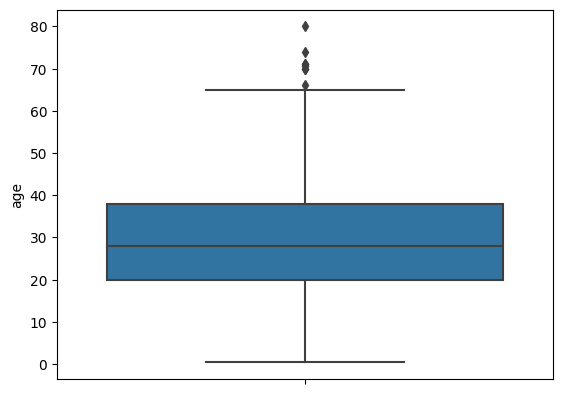

In [30]:
# cheak the outliers in the data (age)
sns.boxplot(y="age", data=New_data)#outlieres are almost from 68 to 90 
plt.show()

# further we will remove outliers from age column in next section DATA WRANGLING

In [ ]:
# convert age into days 
data["age"]=(data["age"] *365).head()
data.rename(columns= {"age" : "age_in_days"}, inplace= True)


 # step 3: Data Visualization

<AxesSubplot: xlabel='age', ylabel='Count'>

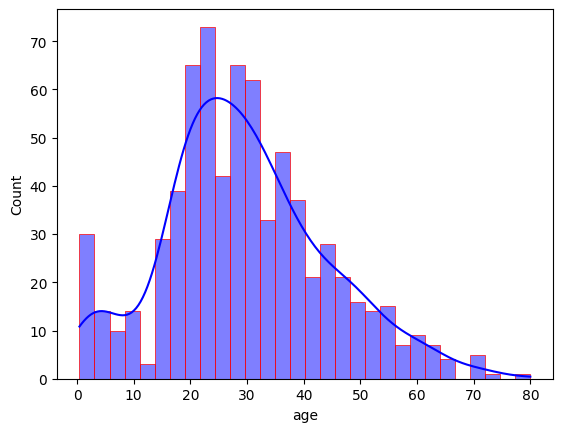

In [33]:
# see the histogram of the data (age) with KDE (kernel density estimation)
sns.histplot(New_data["age"], kde=True, bins=30, color="blue", alpha=0.5, edgecolor="red", linewidth=0.5)

# kde is a way to estimate the probability density function of a continuous random variable 
# bins is the number of bars in the histogram
# alpha is the transparency of the histogram
# edgecolor is the color of the edges of the bars
# linewidth is the width of the edges of the bars


### Boxplot along with Boxenplot

<AxesSubplot: xlabel='sex', ylabel='age'>

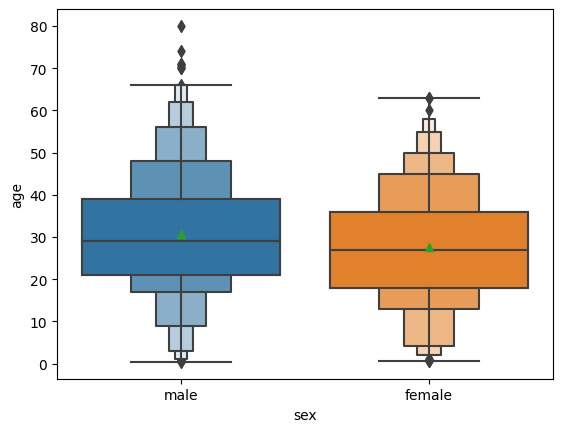

In [34]:
# boxplot of the New_data with boxenplot (boxenplot is a variation of boxplot)
sns.boxplot(x="sex", y="age",showmeans=True, data=New_data)
sns.boxenplot(x="sex", y="age", data=New_data)
# showmeans is to show the mean of the data in the boxplot
# boxenplot is a variation of boxplot that shows more information about the distribution of the data 

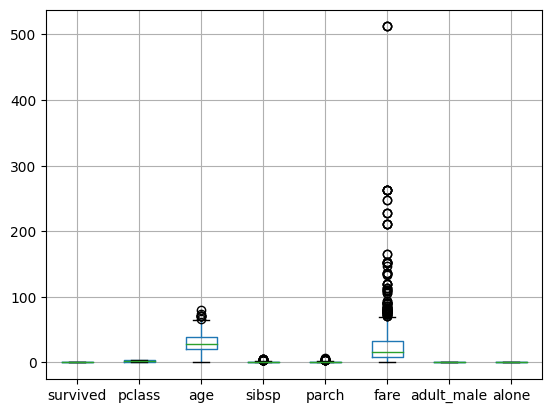

In [36]:
# boxplot of the data with violinplot (violinplot is a variation of boxplot)
New_data.boxplot()
plt.show()

### Displot with one variable

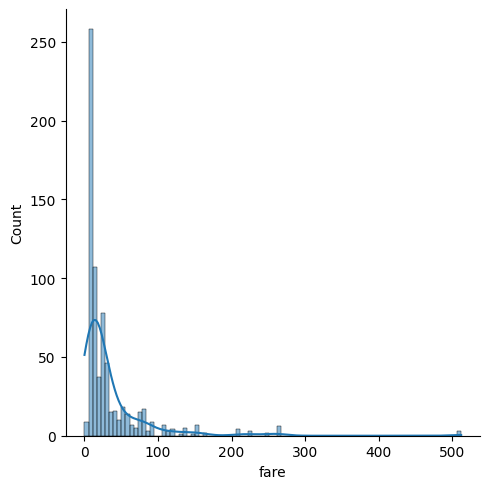

In [38]:
# displot used to show the distribution of the data with KDE (kernel density estimation)
sns.displot(x="fare", kde=True, data=New_data)

### Displot with multiple variables

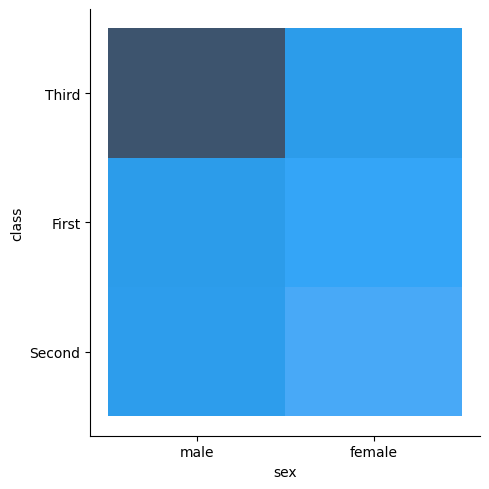

In [39]:
sns.displot(x="sex", y="class", data=New_data) # displot used to show the distribution of the data with KDE (kernel density estimation)

male      577
female    314
Name: sex, dtype: int64


<AxesSubplot: >

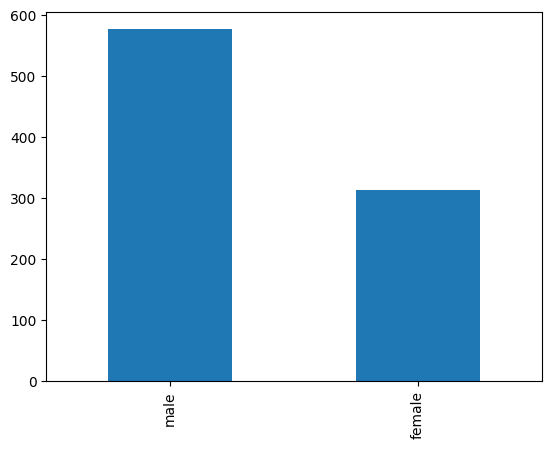

In [40]:
#count the number of unique values in a column 
print (data["sex"].value_counts())

# count the number of unique values in a column by ploting a bar chart
data["sex"].value_counts().plot.bar()

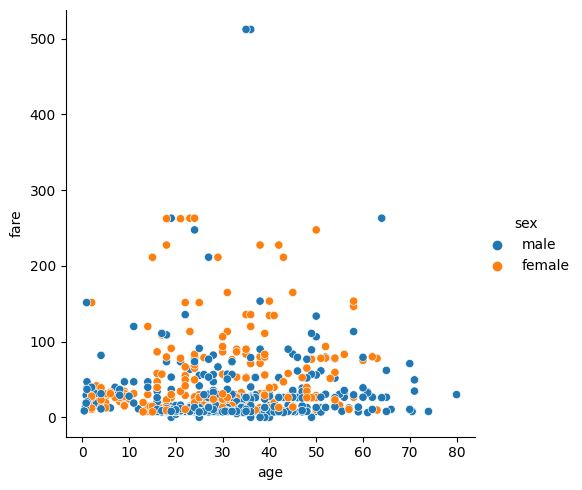

In [42]:
# Relational plot (Relation between age and fare with hue="sex")
sns.relplot(x="age", y="fare", hue="sex", data=data)

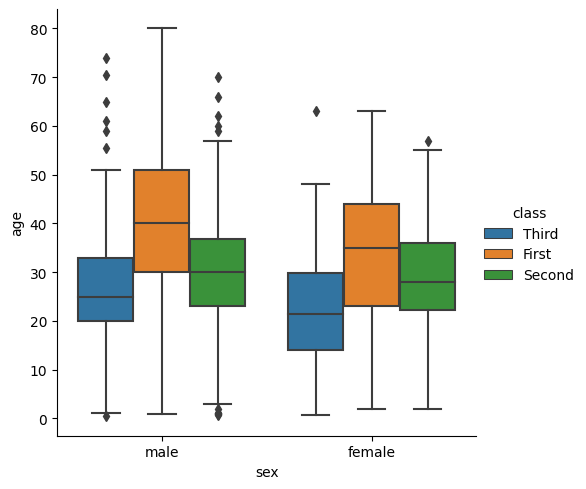

In [43]:
# Catplot (Plot among Categorical and Numeric Columns)
sns.catplot(x="sex", y="age", hue="class", kind="box", data=data)

In [44]:
# correlation between the all columns 
data.corr() 

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot: >

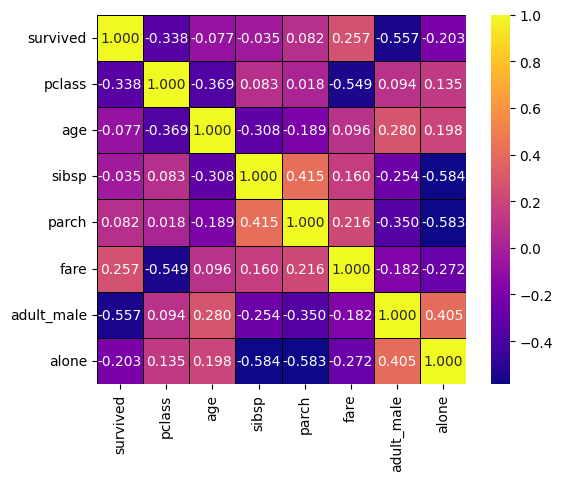

In [55]:
# Correlation Heatmap
sns.heatmap(data.corr(), annot=True, cmap="plasma", linewidths=0.5, linecolor="black", fmt=".3f",
            square=True, cbar=True, cbar_kws={"orientation":"vertical"})

# annot is to show the correlation values in the heatmap (True or False)
# cmap is the color of the heatmap (coolwarm, viridis, plasma, inferno, magma, cividis)
# linewidths is the width of the lines between the cells
# linecolor is the color of the lines between the cells
# fmt is the format of the numbers in the heatmap(".3f" means 3 decimal places)
# square is to make the heatmap square (True or False)
# cbar is to show the colorbar (True or False)
# cbar_kws is the colorbar keyword arguments (orientation)


In [58]:
#correration of one column against other columns
data.corrwith(data["survived"])

survived      1.000000
pclass       -0.338481
age          -0.077221
sibsp        -0.035322
parch         0.081629
fare          0.257307
adult_male   -0.557080
alone        -0.203367
dtype: float64

Skew is: 0.389 , Kurtosis is: 0.178


<AxesSubplot: ylabel='Count'>

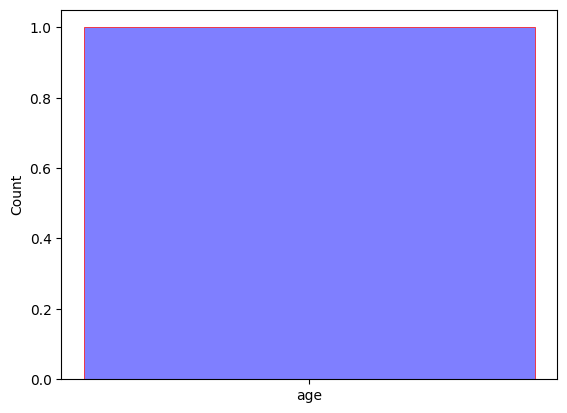

In [59]:
# Measure its skewness and kurtosis
# skewness is the measure of the symmetry of the distribution of the data
# kurtosis is the measure of the shape of the distribution of the data
skew, kurtosis = data["age"].agg(["skew", "kurtosis"]).transpose()
print(f"Skew is: {skew:.3f} , Kurtosis is: {kurtosis:.3f}")
sns.histplot(data=["age"], kde=True, bins=30, color="blue", alpha=0.5, edgecolor="red", linewidth=0.5)

### String Splitting (Feature Engineering)

#### EXAMPLE 01

In [69]:
# import libraries
import numpy as np

# make new data set by using numpy
city = pd.DataFrame(np.array([["Lahore, Pakistan,China,India,Pakistan,Bangladesh,Sri Lanka,Nepal",44,800],
                            ["Beijing, China,India,Pakistan,Bangladesh,Sri Lanka,Nepal",21,500]]),
                            columns=["address","males", "females"])
city

,address,males,females
0,"Lahore, Pakistan,China,India,Pakistan,Banglade...",44,800
1,"Beijing, China,India,Pakistan,Bangladesh,Sri L...",21,500


In [70]:
# split the address column into multiple columns 
city[['country1','country2','country3','country4','country5','country6','country7','country8']] = city.address.str.split(",",expand=True,)
city

,address,males,females,country1,country2,country3,country4,country5,country6,country7,country8
0,"Lahore, Pakistan,China,India,Pakistan,Banglade...",44,800,Lahore,Pakistan,China,India,Pakistan,Bangladesh,Sri Lanka,Nepal
1,"Beijing, China,India,Pakistan,Bangladesh,Sri L...",21,500,Beijing,China,India,Pakistan,Bangladesh,Sri Lanka,Nepal,None


In [71]:
# change the data type of the columns males and females  
city[["males", "females"]] = city[["males", "females"]].astype("int")
city.head()

,address,males,females,country1,country2,country3,country4,country5,country6,country7,country8
0,"Lahore, Pakistan,China,India,Pakistan,Banglade...",44,800,Lahore,Pakistan,China,India,Pakistan,Bangladesh,Sri Lanka,Nepal
1,"Beijing, China,India,Pakistan,Bangladesh,Sri L...",21,500,Beijing,China,India,Pakistan,Bangladesh,Sri Lanka,Nepal,None


In [72]:
# drop the address column 
city_updated = city.drop(["address"], axis=1)
city_updated.head()


,males,females,country1,country2,country3,country4,country5,country6,country7,country8
0,44,800,Lahore,Pakistan,China,India,Pakistan,Bangladesh,Sri Lanka,Nepal
1,21,500,Beijing,China,India,Pakistan,Bangladesh,Sri Lanka,Nepal,None


#### EXAMPLE 02
data splited by ( , )

In [5]:
# import libraries 
import numpy as np
import pandas as pd

# make new data set by using numpy
city=pd.DataFrame(np.array([["New York,London,Paris,Istanbul", 77,88 ],
                            ["china,india,USA,UK", 66,77], 
                            ["Brazil,Argentina,Pakistan,Italy", 55,66]]),
                  columns=["Countries", "male", "female"])
city

,Countries,male,female
0,"New York,London,Paris,Istanbul",77,88
1,"china,india,USA,UK",66,77
2,"Brazil,Argentina,Pakistan,Italy",55,66


In [6]:
city[["country_1", "country_2", "country_3", "country_4"]]=city["Countries"].str.split(",", expand=True)
city

,Countries,male,female,country_1,country_2,country_3,country_4
0,"New York,London,Paris,Istanbul",77,88,New York,London,Paris,Istanbul
1,"china,india,USA,UK",66,77,china,india,USA,UK
2,"Brazil,Argentina,Pakistan,Italy",55,66,Brazil,Argentina,Pakistan,Italy


#### EXAMPLE 03
data splited by ( - )

In [7]:
# step 5: split variables for new coloumns add in data set
Data=pd.DataFrame(np.array([["New York-London-Paris-Istanbul-10-4.5-7777" ], 
                            ["china-india-USA-UK-77-89-2657"], 
                            ["Brazil-Argentina-Pakistan-Italy-100-5.66-9999"],
                            ["New York-London-Paris-Istanbul-10-4.5-7777" ], 
                            ["china-india-USA-UK-77-89-2657"], 
                            ["Brazil-Argentina-Pakistan-Italy-100-5.66-9999"]]), 
                  columns=["Countries-male-ratio-number"])
Data

,Countries-male-ratio-number
0,New York-London-Paris-Istanbul-10-4.5-7777
1,china-india-USA-UK-77-89-2657
2,Brazil-Argentina-Pakistan-Italy-100-5.66-9999
3,New York-London-Paris-Istanbul-10-4.5-7777
4,china-india-USA-UK-77-89-2657
5,Brazil-Argentina-Pakistan-Italy-100-5.66-9999


In [8]:
# split the data set
Data[["country1","country2","country3","country4","male","ratio","number"]]=Data["Countries-male-ratio-number"].str.split("-",expand=True)
Data

,Countries-male-ratio-number,country1,country2,country3,country4,male,ratio,number
0,New York-London-Paris-Istanbul-10-4.5-7777,New York,London,Paris,Istanbul,10,4.5,7777
1,china-india-USA-UK-77-89-2657,china,india,USA,UK,77,89,2657
2,Brazil-Argentina-Pakistan-Italy-100-5.66-9999,Brazil,Argentina,Pakistan,Italy,100,5.66,9999
3,New York-London-Paris-Istanbul-10-4.5-7777,New York,London,Paris,Istanbul,10,4.5,7777
4,china-india-USA-UK-77-89-2657,china,india,USA,UK,77,89,2657
5,Brazil-Argentina-Pakistan-Italy-100-5.66-9999,Brazil,Argentina,Pakistan,Italy,100,5.66,9999


In [9]:
# data info 
Data.info() # all are object type data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Countries-male-ratio-number  6 non-null      object
 1   country1                     6 non-null      object
 2   country2                     6 non-null      object
 3   country3                     6 non-null      object
 4   country4                     6 non-null      object
 5   male                         6 non-null      object
 6   ratio                        6 non-null      object
 7   number                       6 non-null      object
dtypes: object(8)
memory usage: 512.0+ bytes


In [10]:
# type casting of data /data conversion
# in data set male ratio and number should be float type because they are numeric values
Data[["male","ratio","number"]] = Data[["male","ratio","number"]].astype(float) # type casting or change into int or float
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Countries-male-ratio-number  6 non-null      object 
 1   country1                     6 non-null      object 
 2   country2                     6 non-null      object 
 3   country3                     6 non-null      object 
 4   country4                     6 non-null      object 
 5   male                         6 non-null      float64
 6   ratio                        6 non-null      float64
 7   number                       6 non-null      float64
dtypes: float64(3), object(5)
memory usage: 512.0+ bytes


In [11]:
# convert object type data into string type data
Data[["Countries-male-ratio-number","country1","country2","country3","country4"]]=Data[["Countries-male-ratio-number","country1","country2","country3","country4"]].astype("string")
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Countries-male-ratio-number  6 non-null      string 
 1   country1                     6 non-null      string 
 2   country2                     6 non-null      string 
 3   country3                     6 non-null      string 
 4   country4                     6 non-null      string 
 5   male                         6 non-null      float64
 6   ratio                        6 non-null      float64
 7   number                       6 non-null      float64
dtypes: float64(3), string(5)
memory usage: 512.0 bytes


In [12]:
Data.head()

,Countries-male-ratio-number,country1,country2,country3,country4,male,ratio,number
0,New York-London-Paris-Istanbul-10-4.5-7777,New York,London,Paris,Istanbul,10.0,4.50,7777.0
1,china-india-USA-UK-77-89-2657,china,india,USA,UK,77.0,89.00,2657.0
2,Brazil-Argentina-Pakistan-Italy-100-5.66-9999,Brazil,Argentina,Pakistan,Italy,100.0,5.66,9999.0
3,New York-London-Paris-Istanbul-10-4.5-7777,New York,London,Paris,Istanbul,10.0,4.50,7777.0
4,china-india-USA-UK-77-89-2657,china,india,USA,UK,77.0,89.00,2657.0


In [13]:
# #drop the column
Data.drop (["Countries-male-ratio-number"], axis=1, inplace=True)
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country1  6 non-null      string 
 1   country2  6 non-null      string 
 2   country3  6 non-null      string 
 3   country4  6 non-null      string 
 4   male      6 non-null      float64
 5   ratio     6 non-null      float64
 6   number    6 non-null      float64
dtypes: float64(3), string(4)
memory usage: 464.0 bytes
